In [128]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [129]:
#read the raw data
df = pd.read_csv('Global+Superstore+Data.csv')
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [130]:
df.shape

(51290, 5)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


#### We can observe that there are no null values

## Part A: Filter the most consistently profitable market segment

### Data Prepartion
#### We need to convert Order Date to year-month as we want to aggregate data on monthly basis

In [132]:
#convert 'Order Date' column to have only month-year component
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')

In [133]:
df.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-05,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-05,Consumer,Africa,2832.960,311.5200


#### Create new column named 'Market_Segment'

In [134]:
#Club Market and Segment Columns and store it in new Column
df['Market_Segment'] = df.Market+"_"+df.Segment

In [135]:
df.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-05,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,2013-05,Consumer,Africa,2832.960,311.5200,Africa_Consumer


#### Aggregate data by month

In [136]:
#Pivot table 
df_agg = df.pivot_table(index='Order Date',values='Profit',columns='Market_Segment',aggfunc='sum')

In [137]:
df_agg.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


#### Split data into train and test

In [138]:
#Splitting the data first 42 months as train data and last 6 months as test data
train_len = 42
train_df_agg = df_agg[:train_len]
test_df_agg = df_agg[train_len:]

#### We need to find CoV for various market segment to forecast the sales data for market segment with least CoV

In [139]:
#Calculate COV to find out the best market_segment
cov = pd.DataFrame(columns=['Market_Segment','cov'])

In [140]:
for i in train_df_agg.columns:
    temp = {'Market_Segment':i,'cov':np.std(train_df_agg[i])/np.mean(train_df_agg[i])}
    cov = cov.append(temp,ignore_index=True)

In [141]:
cov.sort_values(by='cov')

,Market_Segment,cov
0,APAC_Consumer,0.522725
1,APAC_Corporate,0.530051
12,EU_Consumer,0.595215
15,LATAM_Consumer,0.683770
13,EU_Corporate,0.722076
16,LATAM_Corporate,0.882177
14,EU_Home Office,0.938072
2,APAC_Home Office,1.008219
18,US_Consumer,1.010530
19,US_Corporate,1.071829


#### The most consistently profitable market segment according to CoV is APAC_Consumer

## Part B: Forecating for most consistently profitable market segment(APAC_Consumer)

In [142]:
#Filter data only for APAC_Consumer
df_mkt_seg = df[df.Market_Segment=='APAC_Consumer']
df_mkt_seg.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
2,2013-10,Consumer,APAC,5175.171,919.971,APAC_Consumer
6,2011-07,Consumer,APAC,1822.080,564.840,APAC_Consumer
7,2012-04,Consumer,APAC,5244.840,996.480,APAC_Consumer
14,2013-06,Consumer,APAC,3701.520,1036.080,APAC_Consumer
29,2012-02,Consumer,APAC,1878.720,582.360,APAC_Consumer


* Now that we have filtered data only for APAC_Consumer we can get rid of unecessary columns

In [143]:
#Dropping unnecessary columns
df_mkt_seg = df_mkt_seg[['Order Date','Sales']]
df_mkt_seg.head()

,Order Date,Sales
2,2013-10,5175.171
6,2011-07,1822.080
7,2012-04,5244.840
14,2013-06,3701.520
29,2012-02,1878.720


In [144]:
df_mkt_seg_agg = df_mkt_seg.groupby(['Order Date']).sum()
df_mkt_seg_agg.head()

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000


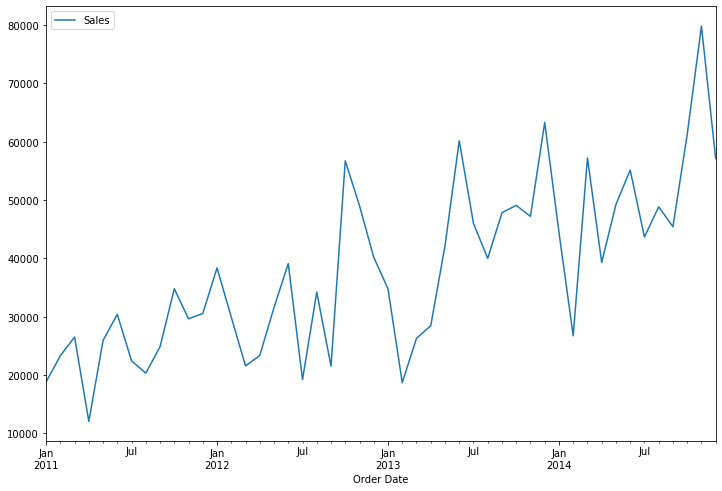

In [145]:
#Plot time series data
df_mkt_seg_agg.plot()
plt.show()

In [146]:
df_mkt_seg_agg = df_mkt_seg_agg.to_timestamp()

In [147]:
df_mkt_seg_agg.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


# Time Series Decomposition

### Additive Seasonal Decomposition

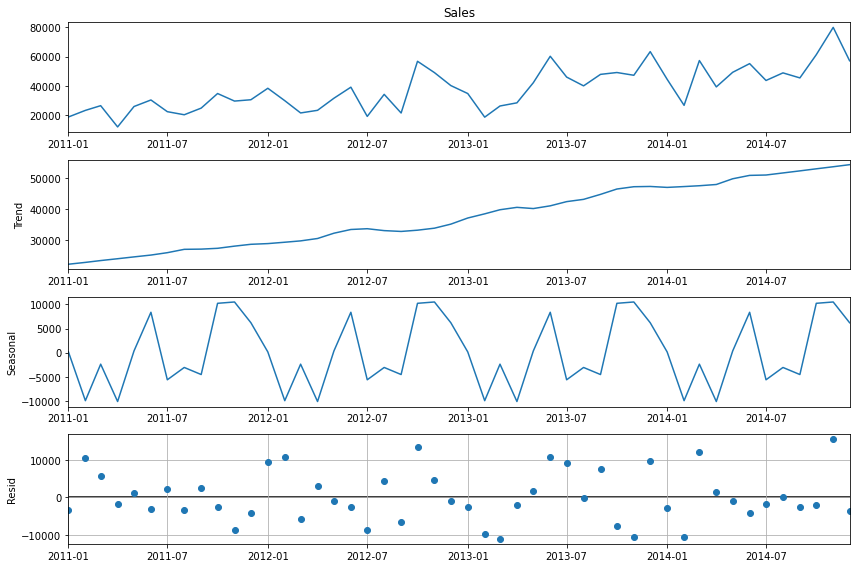

In [148]:
from pylab import rcParams
import statsmodels.api as sm

#set figure parameters
rcParams['figure.figsize']=12,8

#decompose the trend, seasonality and residue component of the data using additive model
decomposition = sm.tsa.seasonal_decompose(df_mkt_seg_agg.Sales, model='additive',extrapolate_trend='freq', period=12)
decomposition.plot()
plt.grid(True)
plt.show()


#### Observation
- There is a visible trend although not completely linear
- We can observse presence of seasonality in the data
- There is no visible pattern in Residual graph

### Multiplicative Seasonal Decomposition

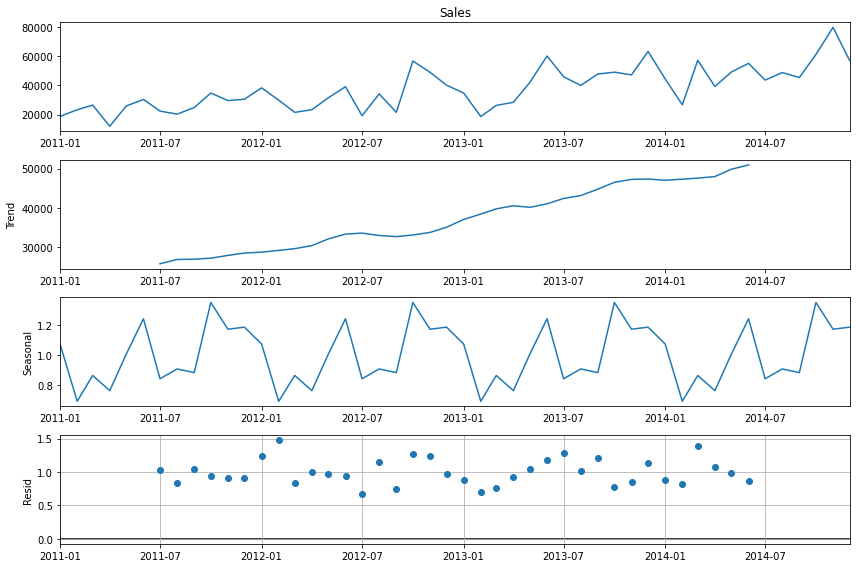

In [149]:
#decompose the trend, seasonality and residue component of the data using multiplicative model
decomposition = sm.tsa.seasonal_decompose(df_mkt_seg_agg.Sales, model='multiplicative')
decomposition.plot()
plt.grid(True)
plt.show()

#### Observations:
- There is a visible trend although not completely linear
- We can observse presence of seasonality in the data
- There is no visible pattern in Residual graph

#### Splitting data into train and test

In [150]:
#Split data into 42 months of train data and 6 months of test data
train_len = 42
train_mkt_seg = df_mkt_seg_agg[:train_len]
test_mkt_seg = df_mkt_seg_agg[train_len:]

## Exponential models

### Simple Exponential Model

- Using the Simplet Exponential Model we can only capture the level of the test data. Trend and Seasonlity will not be captured by Simple Exponential Model.
- This will cause maximum errors in the forecast

In [151]:
from sklearn.metrics import mean_squared_error

# Using Simple Exponential Smoothing method 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train_mkt_seg.Sales)
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.24674418604651163,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 18821.9898,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [152]:
y_hat_ses = test_mkt_seg.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

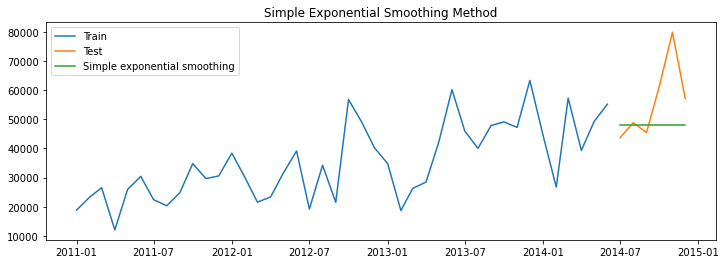

In [153]:
#Plot the train, test and prediction data
plt.figure(figsize=(12,4))
plt.plot(train_mkt_seg.Sales, label='Train')
plt.plot(test_mkt_seg.Sales, label='Test')
plt.plot(y_hat_ses.ses_forecast, label='Simple exponential smoothing')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [154]:
#Calculate the Root Mean Squared Error(RMSE) and Mean Absolute Percentage Error(MAPE)
rmse = np.sqrt(mean_squared_error(test_mkt_seg.Sales, y_hat_ses.ses_forecast)).round(2)
mape = np.round(np.mean(np.abs(test_mkt_seg.Sales-y_hat_ses.ses_forecast)/test_mkt_seg.Sales)*100,2)

#Store the Errors in a DataFrame
results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse], 'MAPE': [mape]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74


### Holt's exponential model

- Using Holt's exponential model we will be able to caputre the level and the trend but not the seaonality for the test data.
- This will reduce the errors in the forecast compared to Simple Exponential Smoothing 

In [155]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Using Holt's Exponential Model
model = ExponentialSmoothing(train_mkt_seg.Sales, seasonal_periods=12, trend='additive',seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.2642857142857143, 'smoothing_trend': 0.19220779220779222, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 18821.9898, 'initial_trend': 4491.363300000001, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


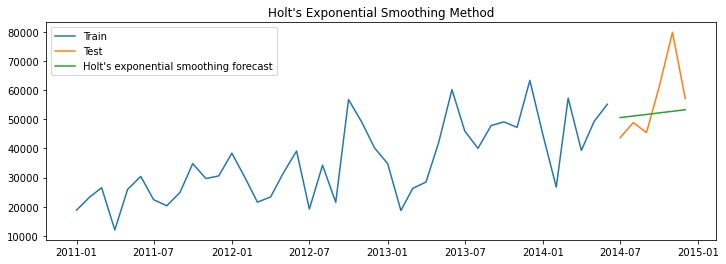

In [156]:
y_hat_holt = test_mkt_seg.copy()
y_hat_holt['holt forecast'] = model_fit.forecast(len(test_mkt_seg))

#Plot the train, test and prediction data
plt.figure(figsize=(12,4))
plt.plot(train_mkt_seg['Sales'], label='Train')
plt.plot(test_mkt_seg['Sales'], label='Test')
plt.plot(y_hat_holt['holt forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [157]:
#Calculate the Root Mean Squared Error(RMSE) and Mean Absolute Percentage Error(MAPE)
rmse = np.sqrt(mean_squared_error(test_mkt_seg.Sales, y_hat_holt['holt forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_mkt_seg.Sales-y_hat_holt['holt forecast'])/test_mkt_seg['Sales'])*100,2)

#Store the Errors in a DataFrame
temp = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, temp])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93


### Holt Winter's Additive Method

Holt Winter's Additve Method caputres the Level, the Trend and the Seasonality component of the Test data thus reducing the errors in the forecast

In [158]:
#Using Holt Winter's Additive Model
model = ExponentialSmoothing(np.asarray(train_mkt_seg.Sales),seasonal_periods=12,trend='add',seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.07570161375621302, 'smoothing_trend': 0.010812706273785031, 'smoothing_seasonal': 0.10268263228517635, 'damping_trend': nan, 'initial_level': 34102.51403585773, 'initial_trend': 627.5980523821329, 'initial_seasons': array([-15283.12174868, -10806.9097142 ,  -7597.31497467, -22062.63969954,
        -8170.14182   ,  -3709.0988033 , -11681.8447568 , -13779.08847052,
        -9254.46937208,    676.71909654,  -4462.6159807 ,  -3555.20416798]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


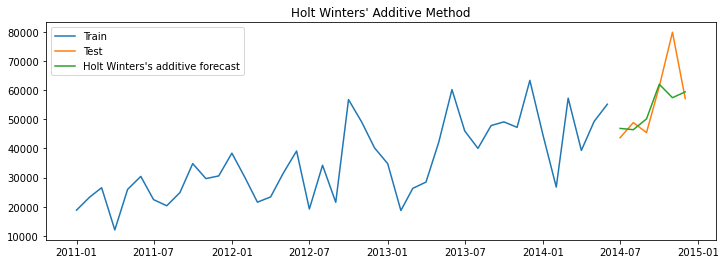

In [159]:
y_hat_hwa = test_mkt_seg.copy()
y_hat_hwa['hw forecast'] = model_fit.forecast(len(test_mkt_seg))

#Plot the train, test and prediction data
plt.figure(figsize=(12,4))
plt.plot(train_mkt_seg.Sales, label='Train')
plt.plot(test_mkt_seg.Sales, label='Test')
plt.plot(y_hat_hwa['hw forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [160]:
#Calculate the Root Mean Squared Error(RMSE) and Mean Absolute Percentage Error(MAPE)
rmse = np.sqrt(mean_squared_error(test_mkt_seg['Sales'], y_hat_hwa['hw forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_mkt_seg['Sales']-y_hat_hwa['hw forecast'])/test_mkt_seg['Sales'])*100,2)

#Store the Errors in a DataFrame
temp = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, temp])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9555.63,9.33


### Holt Winter's Multiplicative Method

In [161]:
#Using Holt Winter's Multiplicative Model
model = ExponentialSmoothing(np.asarray(train_mkt_seg['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833334, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


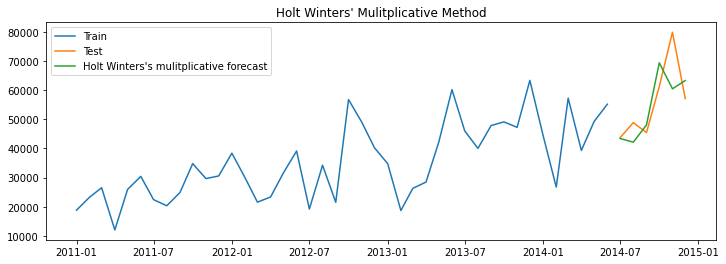

In [162]:
y_hat_hwm = test_mkt_seg.copy()
y_hat_hwm['hw forecast'] = model_fit.forecast(len(test_mkt_seg))

#Plot the train, test and prediction data
plt.figure(figsize=(12,4))
plt.plot(train_mkt_seg['Sales'], label='Train')
plt.plot(test_mkt_seg['Sales'], label='Test')
plt.plot(y_hat_hwm['hw forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [163]:
#Calculate the Root Mean Squared Error(RMSE) and Mean Absolute Percentage Error(MAPE)
rmse = np.sqrt(mean_squared_error(test_mkt_seg['Sales'], y_hat_hwm['hw forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_mkt_seg['Sales']-y_hat_hwm['hw forecast'])/test_mkt_seg['Sales'])*100,2)

#Store the Errors in a DataFrame
temp = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, temp])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9555.63,9.33
0,Holt Winters' multiplicative method,9423.23,11.43


## Auto Regression Methods

### Tests for Stationality

Augmented Dickey-Fuller (ADF) Test and KPSS Test is used to test for stationality

Accordingly following four cases are possible:
- Both tests conclude that the series is not stationary -> series is not stationary
- Both tests conclude that the series is stationary -> series is stationary
- ADF - not stationary and KPSS - stationary -> trend stationary, remove the trend to make series strict stationary
- ADF - stationary and KPSS - not stationary -> difference stationary, use differencing to make series strict stationary

### Augmented Dickey-Fuller (ADF) test

In [164]:
from statsmodels.tsa.stattools import adfuller
#Using ADF test
adf_test = adfuller(df_mkt_seg_agg['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %.3f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.012


The series is stationary as p-value is less than 0.05.

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [165]:
from statsmodels.tsa.stattools import kpss
#Using KPSS test
kpss_test = kpss(df_mkt_seg_agg['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


The series is not stationary as p-value is less than 0.05.

### Box Cox transformation to make variance constant

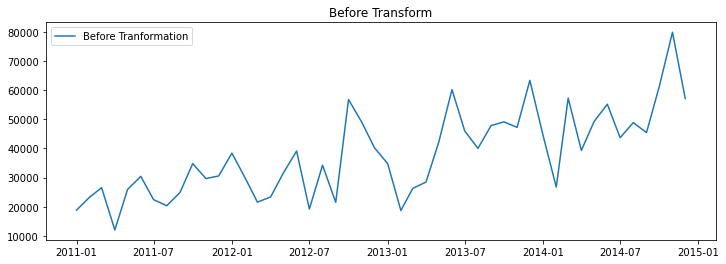

In [166]:
#Plot the untransormed data
plt.figure(figsize=(12,4))
plt.plot(df_mkt_seg_agg, label='Before Tranformation')
plt.legend(loc='best')
plt.title('Before Transform')
plt.show()

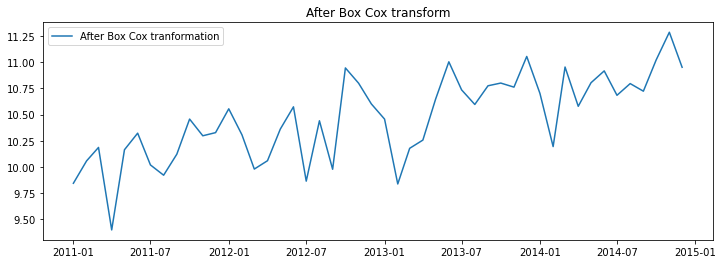

In [167]:
from scipy.stats import boxcox
#Perform BoxCox transformation
df_boxcox = pd.Series(boxcox(df_mkt_seg_agg['Sales'], lmbda=0), index = df_mkt_seg_agg.index)

#Plot data after transformation
plt.figure(figsize=(12,4))
plt.plot(df_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

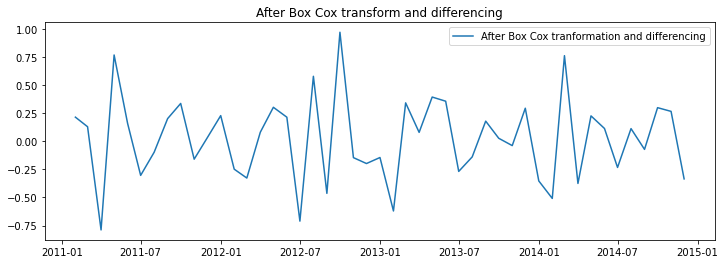

In [168]:
#Perform differentiation
df_boxcox_diff = pd.Series(df_boxcox - df_boxcox.shift(), df_mkt_seg_agg.index)

#Plot data after transformation
plt.figure(figsize=(12,4))
plt.plot(df_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [169]:
#Drop the heading and trailing NA values
df_boxcox_diff.dropna(inplace=True)

### Splitting data into train and test

In [170]:
#Split the transformed data into train and test data
train_df_boxcox = df_boxcox[:train_len]
test_df_boxcox = df_boxcox[train_len:]
train_df_boxcox_diff = df_boxcox_diff[:train_len-1]
test_df_boxcox_diff = df_boxcox_diff[train_len-1:]

### Auto Regression Method (AR)

Using the AR component of ARIMA model we can only capture the trend and level of the data

In [171]:
from statsmodels.tsa.arima_model import ARIMA

#Using only the AR component of ARIMA
model = ARIMA(train_df_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


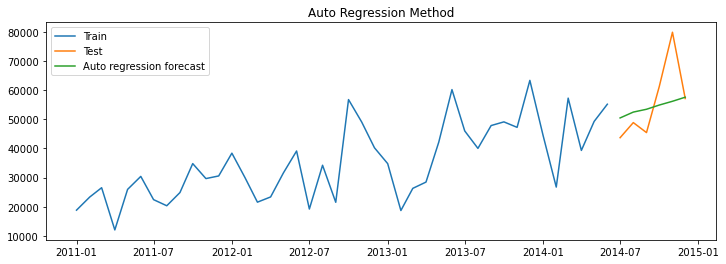

In [172]:
y_hat_ar = df_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum() #Perform intergration
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(df_boxcox[0]) #Add the first record
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

#Plot the train, test and prediction data
plt.figure(figsize=(12,4))
plt.plot(train_mkt_seg['Sales'], label='Train')
plt.plot(test_mkt_seg['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test_mkt_seg.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [173]:
#Calculate the Root Mean Squared Error(RMSE) and Mean Absolute Percentage Error(MAPE)
rmse = np.sqrt(mean_squared_error(test_mkt_seg['Sales'], y_hat_ar['ar_forecast'][test_mkt_seg.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_mkt_seg['Sales']-y_hat_ar['ar_forecast'][test_mkt_seg.index.min():])/test_mkt_seg['Sales'])*100,2)

#Store Errors in DataFrame
temp = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, temp])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9555.63,9.33
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56


### Moving Average Method (MA)

Using MA component of ARIMA Model we can only capture the level and trend

In [174]:
#Using only the MA component of ARIMA
model = ARIMA(train_df_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


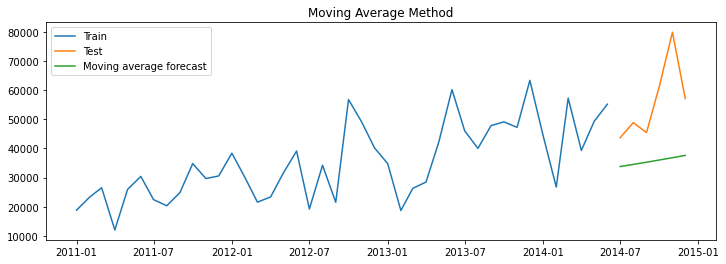

In [175]:
y_hat_ma = df_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum() #Perform integration
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(df_boxcox[0]) #Add the first value in the transformed data
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

#Plot the train, test and prediction data
plt.figure(figsize=(12,4))
plt.plot(train_mkt_seg['Sales'], label='Train')
plt.plot(test_mkt_seg['Sales'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test_mkt_seg.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [176]:
#Calculate the Root Mean Squared Error(RMSE) and Mean Absolute Percentage Error(MAPE)
rmse = np.sqrt(mean_squared_error(test_mkt_seg['Sales'], y_hat_ma['ma_forecast'][test_mkt_seg.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_mkt_seg['Sales']-y_hat_ma['ma_forecast'][test_mkt_seg.index.min():])/test_mkt_seg['Sales'])*100,2)

#Store Errors in DataFrame
temp = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, temp])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9555.63,9.33
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


### Auto Regression Moving Average (ARMA)

ARMA uses the AR and MA component of the ARIMA Model and performs sligtly better than only using AR or MA

In [177]:
#Using only the AR and MA component of ARIMA
model = ARIMA(train_df_boxcox_diff, order=(1,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


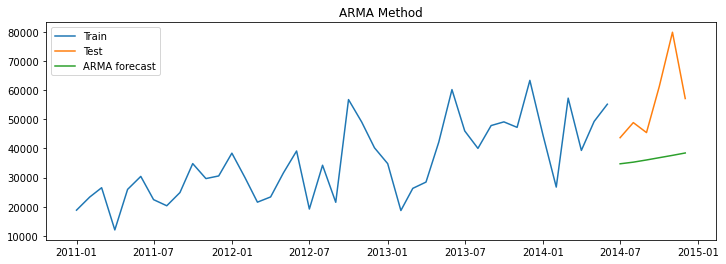

In [178]:
y_hat_arma = df_boxcox_diff.copy()
y_hat_arma['arma_forecast_transformation'] = model_fit.predict(df_boxcox_diff.index.min(),df_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_transformation'].cumsum()#Perform integration
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(df_boxcox[0]) #Add first value in the transformed data
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

#Plot the train, test and prediction data
plt.figure(figsize=(12,4))
plt.plot(train_mkt_seg['Sales'], label='Train')
plt.plot(test_mkt_seg['Sales'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test_mkt_seg.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [179]:
#Calculate the Root Mean Squared Error(RMSE) and Mean Absolute Percentage Error(MAPE)
rmse = np.sqrt(mean_squared_error(test_mkt_seg['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test_mkt_seg['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test_mkt_seg['Sales'])*100,2)

#Store Errors in DataFrame
temp = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, temp])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9555.63,9.33
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


### Auto Regression Integrated Moving Average (ARIMA)

In [180]:
#We will pass train_df_boxcox instead of transformed data as ARIMA takes care of differentiation.
model = ARIMA(train_df_boxcox,order = (1,1,1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


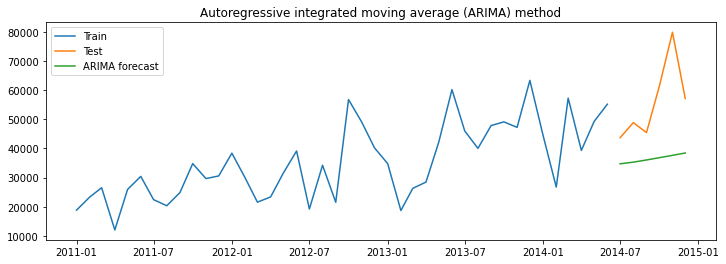

In [181]:
y_hat_arima = df_boxcox_diff.copy()
y_hat_arima['arima_forecast_transformation'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_transformation'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(df_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

#Plot the train, test and prediction data
plt.figure(figsize=(12,4))
plt.plot(train_mkt_seg['Sales'], label='Train')
plt.plot(test_mkt_seg['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_mkt_seg.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [182]:
#Calculate the Root Mean Squared Error(RMSE) and Mean Absolute Percentage Error(MAPE)
rmse = np.sqrt(mean_squared_error(test_mkt_seg['Sales'], y_hat_arima['arima_forecast'][test_mkt_seg.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_mkt_seg['Sales']-y_hat_arima['arima_forecast'][test_mkt_seg.index.min():])/test_mkt_seg['Sales'])*100,2)

#Store Errors in DataFrame
temp = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, temp])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9555.63,9.33
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40
0,Autoregressive integrated moving average (ARIM...,22654.32,32.40


### Seasonal Auto Regression Integrated Moving Average (SARIMA)

In [183]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Using Seasonalilty,AR and MA component of SARIMAX Model
model = SARIMAX(train_df_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.041851
ma.L1      -0.996000
ar.S.L12    0.099125
ma.S.L12   -0.957885
sigma2      0.059078
dtype: float64


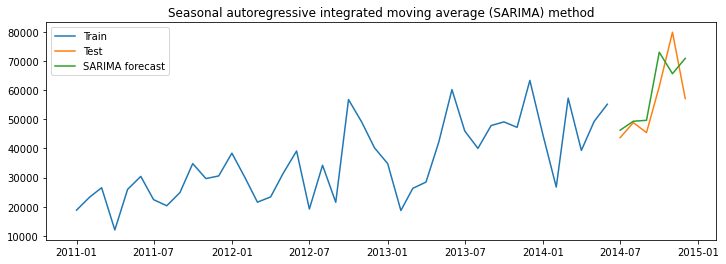

In [184]:
y_hat_sarima = df_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

#Plot the train, test and prediction data
plt.figure(figsize=(12,4))
plt.plot(train_mkt_seg['Sales'], label='Train')
plt.plot(test_mkt_seg['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_mkt_seg.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [185]:
#Calculate the Root Mean Squared Error(RMSE) and Mean Absolute Percentage Error(MAPE)
rmse = np.sqrt(mean_squared_error(test_mkt_seg['Sales'], y_hat_sarima['sarima_forecast'][test_mkt_seg.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_mkt_seg['Sales']-y_hat_sarima['sarima_forecast'][test_mkt_seg.index.min():])/test_mkt_seg['Sales'])*100,2)

#Store Errors in DataFrame
temp = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, temp])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9555.63,9.33
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40
0,Autoregressive integrated moving average (ARIM...,22654.32,32.40
0,Seasonal autoregressive integrated moving aver...,9616.66,12.87


# Conclusion

- We observed that the given data is timeseries data as it contains date component
- According to CoV, APAC_Consumer is the most consistently profitable market segment
- After decomposing data we could see an upward trend although not linear
- There is a week seasonality component in the data
- The data is difference stationary
- Among the Exponential models:
    - Simple Exponential Smoothing has maximum errors (Only caputers Level)
    - Holt Winter's Additive method has the least errors (Caputres Level, Trend and Sesonality)
- Among the Auto Regression Models:
    - Moving Average has maximum errors (Caputres only Level and Trend)
    - SARIMA has least errors (Captures Level, Trend and Seasonality)